In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
2151261235 % 16 + 1

4

In [192]:
df = pd.read_csv('SMPcap 2021.csv')
df.head(10)

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1/1/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,1/2/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,1/3/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,1/4/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,1/5/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
5,1/6/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
6,1/7/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
7,1/8/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
8,1/9/2021,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,...,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1
9,1/10/2021,966.7,966.7,966.7,966.7,966.7,966.7,966.7,966.7,966.7,...,966.8,966.8,966.8,966.8,966.8,966.8,966.7,966.7,966.7,966.7


In [194]:
columns = ['4', '5', '6']

In [195]:
data = df[columns]

In [196]:
test_size = 0.2 * data.shape[0]
test_size = int(test_size)
test_size

73

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

kf = KalmanFilter(initial_state_mean=0, n_dim_obs=3)

kf = kf.em(data.values[:-test_size], n_iter=10)

state_means, state_covariances = kf.smooth(data.values[-test_size:])

In [199]:
state_means.shape

(73, 1)

In [200]:
data.values[-test_size:][:]

array([[1069.4, 1069.4, 1069.4],
       [1061.5, 1061.5, 1061.5],
       [1061.5, 1061.5, 1061.5],
       [1002. , 1002. , 1002. ],
       [ 966.7,  966.7,  966.7],
       [1002. , 1002. , 1002. ],
       [1022.6, 1022.6, 1022.6],
       [1022.6, 1022.6, 1022.6],
       [ 990.9,  990.9,  990.9],
       [1002. , 1002. , 1002. ],
       [ 990.9,  990.9,  990.9],
       [ 945.4,  945.4,  945.5],
       [1002. , 1002. , 1002. ],
       [1061.5, 1061.5, 1061.5],
       [1002. , 1002. , 1002. ],
       [1022.6, 1022.6, 1022.6],
       [1002. , 1002. , 1002. ],
       [ 990.9,  990.9,  990.9],
       [ 963.6,  963.6,  963.6],
       [ 990.9,  990.9,  990.9],
       [1002. , 1002. , 1002. ],
       [1069.4, 1069.4, 1069.4],
       [1069.4, 1069.4, 1069.4],
       [1061.5, 1061.5, 1061.5],
       [1002. , 1002. , 1002. ],
       [ 966.7,  966.7,  966.8],
       [1069.4, 1069.4, 1069.4],
       [1069.4, 1069.4, 1069.4],
       [1069.4, 1069.4, 1069.4],
       [1061.5, 1061.5, 1061.5],
       [10

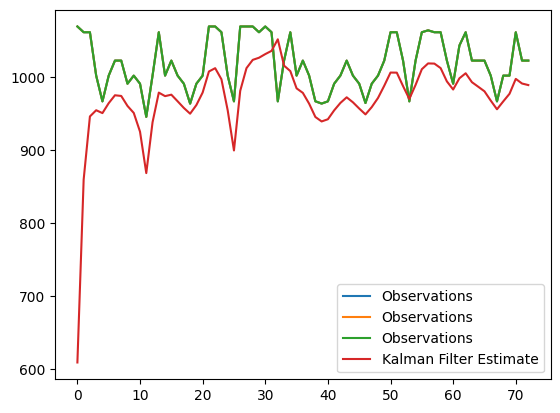

In [201]:
# Vẽ kết quả
plt.plot(data.values[-test_size:][:], label='Observations')
plt.plot(state_means, label='Kalman Filter Estimate')
plt.legend()
plt.show()

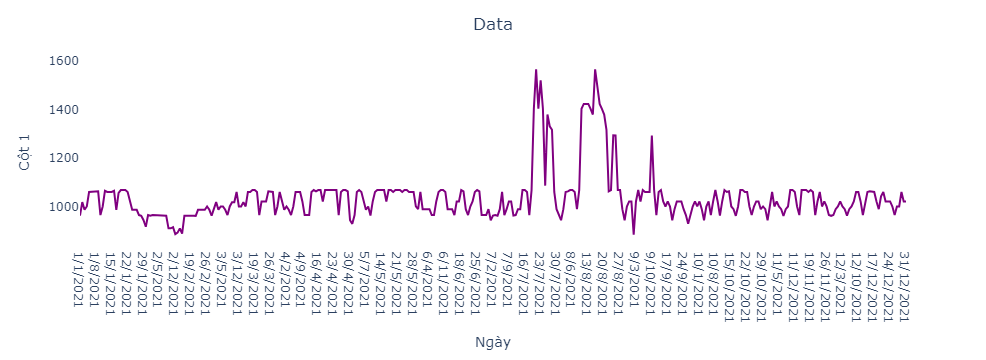

In [202]:
import plotly.express as px
fig = px.line(y=df['4'], x=df['Ngày'])
fig.update_traces(line_color='purple') 
fig.update_layout(xaxis_title="Ngày", 
                  yaxis_title="Cột 1",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,255,255,0.8)')

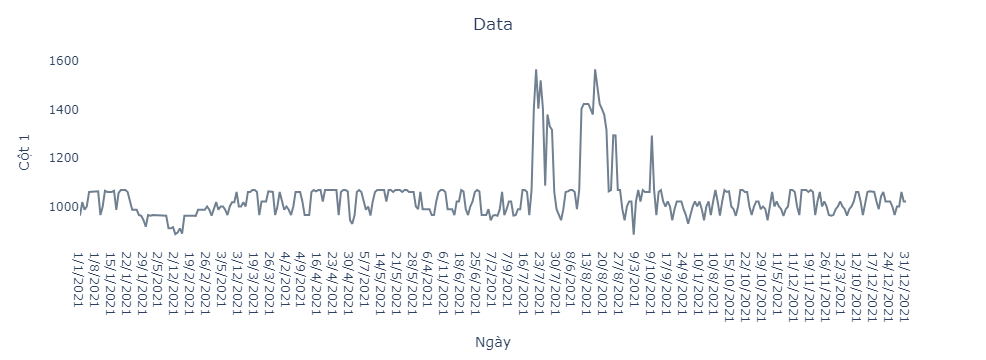

In [203]:
import plotly.express as px
fig = px.line(y=df['5'], x=df['Ngày'])
fig.update_traces(line_color='slategray') 
fig.update_layout(xaxis_title="Ngày", 
                  yaxis_title="Cột 1",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,255,255,0.8)')

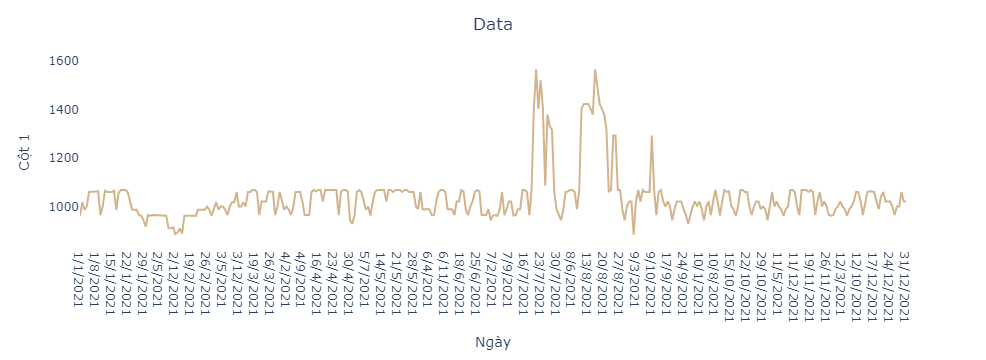

In [204]:
import plotly.express as px
fig = px.line(y=df['6'], x=df['Ngày'])
fig.update_traces(line_color='tan') 
fig.update_layout(xaxis_title="Ngày", 
                  yaxis_title="Cột 1",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,255,255,0.8)')

In [205]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from hmmlearn import hmm

In [211]:
observations = data.values

In [212]:
model = GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)

In [213]:
model.fit(observations)

GaussianHMM(n_components=2, n_iter=1000)

In [214]:
hidden_states = model.predict(observations)

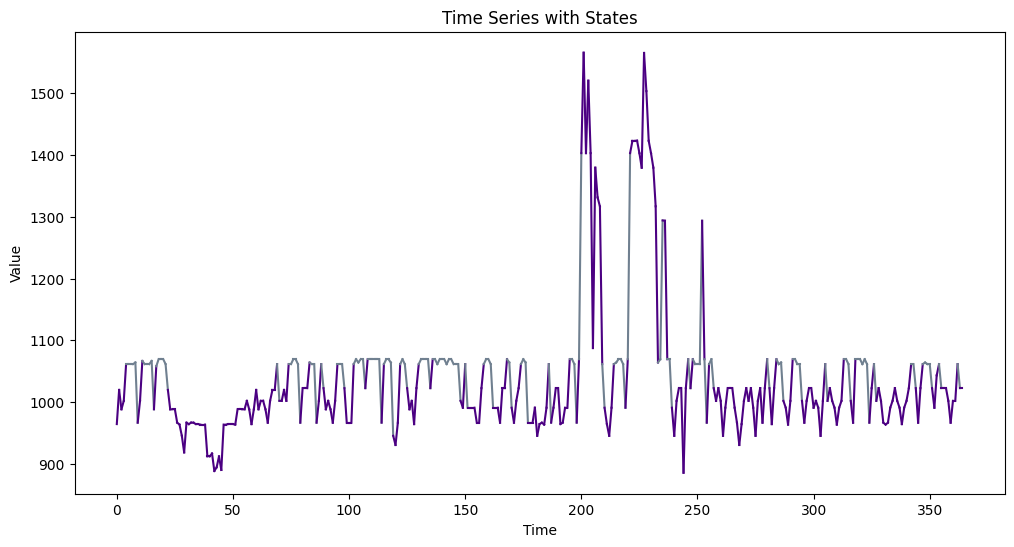

In [177]:
# Tạo một biểu đồ đường cho cột giá trị số thực
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ đường với màu sắc dựa trên giá trị số nguyên
for i in range(len(data) - 1):
    plt.plot(df.index[i:i+2], df['4'][i:i+2], color='slategray' if hidden_states[i] == 0 else 'indigo')

# Thiết lập nhãn và tiêu đề
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series with States')
plt.show()

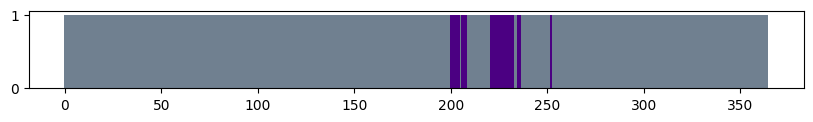

In [216]:
state2color = {} 
state2color['0'] = 'slategray'
state2color['1'] = 'indigo'

def plot_price(samples, state2color): 
    colors = [state2color[str(x)] for x in samples]
    x = np.arange(0, len(colors))
    y = np.ones(len(colors))
    plt.figure(figsize=(10,1))
    plt.bar(x, y, color=colors, width=1)
    
plot_price(hidden_states, state2color)

In [179]:
transmat = np.array([[0.9, 0.1], 
                     [0.7, 0.3]])

# Start probabilities for 2 states
start_prob = np.array([0.6, 0.4])

# Emission probabilities
# Yellow and red have high probs for sunny 
# Blue and grey have high probs for cloudy 
# emission_probs = np.array([[0.4, 0.4, 0.1, 0.1], 
#                            [0.1, 0.1, 0.6, 0.2]])

emission_probs = np.array([[0.4, 0.4, 0.1, 0.1], 
                           [0.1, 0.1, 0.6, 0.2]])

# Create the HMM model with 2 states
model = GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)
model.startprob_ = start_prob 
model.transmat_ = transmat 
model.emissionprob_ = emission_probs

In [113]:
model.fit(observations)

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


GaussianHMM(n_components=2, n_iter=1000)

In [114]:
hidden_states = model.predict(observations)

In [115]:
hidden_states

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

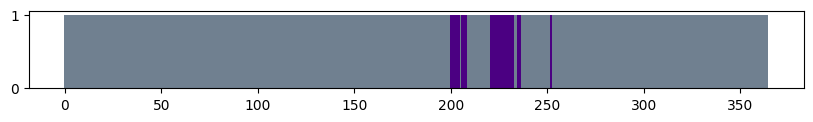

In [116]:
plot_price(hidden_states, state2color)